## Linear Regression
A regression attempts to fit a function to observed data to make predictions on new data. A linear regression fits a straight line to observed data, attempting to demonstrate a linear relationship between variables and make predictions on new data yet to be observed.

m = [1.93939394]
b = 4.7333333333333325


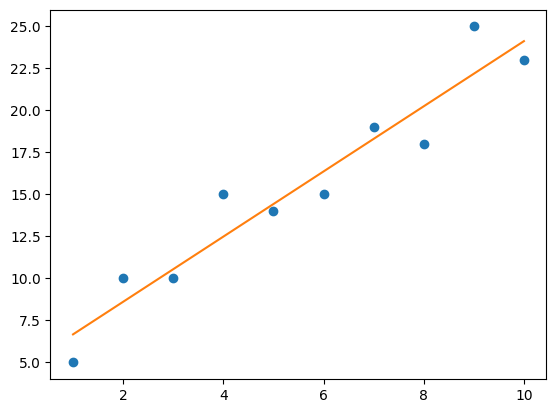

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

m = fit.coef_
b = fit.intercept_
print("m = {0}".format(m))
print("b = {0}".format(b))

# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.show()

What decides the best fit line to these points? 
### Residuals and Squared Errors
How do statistics tools like scikit-learn come up with a line that fits to these points? It
comes down to two questions that are fundamental to machine learning training:
- What defines a “best fit”?
- How do we get to that “best fit”?

In [5]:
import pandas as pd
# Import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()
# Test with a given line
m = 1.93939
b = 4.73333

# Calculate the residuals
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [6]:
# calculating the sum of squares for a given line and data
# Import points
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()
# Test with a given line
m = 1.93939
b = 4.73333
sum_of_squares = 0.0
# calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared
    print("sum of squares = {}".format(sum_of_squares))

sum of squares = 2.7979921984
sum of squares = 4.7242308505000015
sum of squares = 5.028383100500002
sum of squares = 11.3240160926
sum of squares = 11.509156971000001
sum of squares = 13.3851528799
sum of squares = 13.862550963500002
sum of squares = 18.918078365999996
sum of squares = 26.82632223160001
sum of squares = 28.096969704500005


#### Finding the best fit line

##### Closed form Equation
For a simple linear regression with only one input and one output variable, here are the closed form equations to calculate $m$ and $b$

$$ m = \frac{n\sum{xy}-\sum x\sum y}{n\sum x^{2} - \left( \sum x \right)^2}$$
$$ b = \frac{\sum y}{n} - m\frac{\sum x}{n} $$


In [8]:
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())
n = len(points)

m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) - sum(p.x for p in points)**2)
b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


#### Inverse Matrix Techniques

Lets alternate the coefficients $m$ and $b$ with different names, $\beta_{1}$ and $\beta_{0}$, respectively.

$$ b = \left( X^{T} .\ X\right)^{-1} .\ X^{T} .\ y$$

In [12]:
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficents for slope and intercept
b = np.linalg.inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)

print(b) # [1.93939394, 4.73333333]

# Predict against the y-values
y_predict = X_1.dot(b)

[1.93939394 4.73333333]


#### Gradient Descent
Gradient descent is an optimization technique that uses derivatives and iterations to minimize/maximize a set of parameters against an objective.
Let's try to work on the function
$$f\left( x \right)=\left( x-3\right)^{2} + 4$$
we want to “step” x toward the minimum where the slope is 0.

In [16]:
import random

def f(x):
    return (x - 3) ** 2 + 4

def dx_f(x):
    return 2*(x - 3)

# The learning rate
L = 0.01

# The number of iterations to perform gradient descent
iterations = 1000

# start at a random x
x = random.randint(-15,15)

for i in range(iterations):
    # get slope
    d_x = dx_f(x)
    x -= L * d_x
    print(x, f(x))

-9.74 166.3076
-9.4852 159.88021904000001
-9.235496000000001 153.70736236601604
-8.990786080000001 147.77895081632178
-8.750970358400002 142.08530436399548
-8.515950951232002 136.61712631118124
-8.285631932207362 131.36548810925848
-8.059919293563215 126.32181478013186
-7.838720907691951 121.47787091483862
-7.621946489538113 116.82574722661103
-7.40950755974735 112.35784763643724
-7.201317408552403 108.06687687003429
-6.997291060381355 103.94582854598093
-6.797345239173728 99.98797373556012
-6.601398334390253 96.18684997563194
-6.409370367702448 92.53625071659688
-6.221182960348399 89.03021518821966
-6.036759301141431 85.66301866676615
-5.856024115118602 82.42916312756222
-5.678903632816231 79.32336826771075
-5.505325560159906 76.34056288430943
-5.3352190489567075 73.47587659409076
-5.168514667977574 70.72463188096478
-5.005144374618022 68.08233645847858
-4.845041487125662 65.54467593472282
-4.688140657383149 63.10750676770779
-4.534377844235485 60.76684949970656
-4.383690287350776 58.

### Gradient Descent & Linear Regression
we can apply the same concept, but instead of minimizing the variable x, we minimize 'm' and 'b'. 

How do we calculate the slopes for m and b? We need the partial derivatives for each of these. What function are we taking the derivative of? Remember we are trying to minimize loss and that will be the sum of squares. So we need to find the derivatives of our sum of squares function with respect to m and b. [More on Gradient descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)

$$ loss = \frac{1}{n} \sum_{i=0}^{n} \left( y_{i} - \left(mx_{i} + c\right)\right)^{2}$$

calculate partial derivatives with respect to $m$ and $b$
$$\frac{\partial\ loss}{\partial\ m} =  \frac{1}{n} \sum_{i=0}^{n} 2\left( y_{i} - \left(mx_{i} + c\right)\right)\left( -x_{i} \right)\\
=  \frac{-2}{n} \sum_{i=0}^{n} x_{i}\left( y_{i} - \overline{y}_{i} \right)$$

$$ \frac{\partial\ loss}{\partial\ b} =  \frac{-2}{n} \sum_{i=0}^{n} \left( y_{i} - \overline{y}_{i} \right) $$







In [21]:
# Import points from CSV
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# Building the model
m = 0.0
b = 0.0

# The learning Rate
L = .001

# The number of iterations
iterations = 100_000
n = float(len(points)) # Number of elements in X

# Perform Gradient Descent
for i in range(iterations):

    # slope with respect to m
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    
    # slope with respect to b
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)
    
    # update m and b
    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))

y = 1.9393939393939548x + 4.733333333333227


#### Gradient descent using SymPy

the SymPy code that came up with these two derivatives for the sum of squares function, for m and b respectively

In [22]:
from sympy import *
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)
sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)

print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


In [28]:
# Solving using sympy

import pandas as pd
from sympy import *
# Import points from CSV
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m) \
    .subs(n, len(points) - 1).doit() \
        .replace(x, lambda i: points[i].x) \
            .replace(y, lambda i: points[i].y)

d_b = diff(sum_of_squares, b) \
    .subs(n, len(points) - 1).doit() \
        .replace(x, lambda i: points[i].x) \
            .replace(y, lambda i: points[i].y)


# compile using lambdify for faster computation
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# Building the model
m = 0.0
b = 0.0

# The learning Rate
L = .001

# The number of iterations
iterations = 100_000

# Perform Gradient Descent
for i in range(iterations):
    # update m and b
    m -= d_m(m,b) * L
    b -= d_b(m,b) * L

print("y = {0}x + {1}".format(m, b))

y = 1.939393939393954x + 4.733333333333231
